# 数据读取

In [30]:
import pandas as pd
train_df = pd.read_csv('./train_set.csv', sep='\t') #取全部数据
#train_df = pd.read_csv('./train_set.csv', sep='\t',nrows=100) 因为数据集特别大取100行

In [31]:
train_df.head(10)

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...
5,9,3819 4525 1129 6725 6485 2109 3800 5264 1006 4...
6,3,307 4780 6811 1580 7539 5886 5486 3433 6644 58...
7,10,26 4270 1866 5977 3523 3764 4464 3659 4853 517...
8,12,2708 2218 5915 4559 886 1241 4819 314 4261 166...
9,3,3654 531 1348 29 4553 6722 1474 5099 7541 307 ...


第一列为新闻的类别，第二列为新闻的字符。

# 数据分析


此步骤我们读取了所有的训练集数据，在此我们通过数据分析希望得出以下结论：

* 赛题数据中，新闻文本的长度是多少？
* 赛题数据的类别分布是怎么样的，哪些类别比较多？
* 赛题数据中，字符分布是怎么样的？

## 句子长度分析

In [32]:
%pylab inline
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


下图将句子长度绘制直方图

Text(0.5,1,'Histogram of char count')

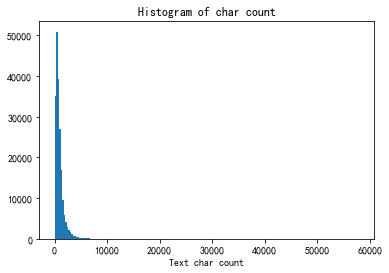

In [33]:
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

## 新闻类别分布

Text(0.5,0,'category')

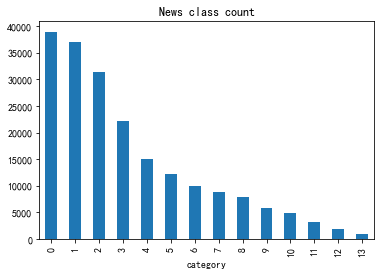

In [34]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中体育类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

## 字符分布统计

In [35]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))

print(word_count[0])

print(word_count[-1])

6869
('3750', 7482224)
('3133', 1)


在训练集中总共包括6869个字，其中编号3750的字出现的次数最多，编号3133的字出现的次数最少

根据字在每个句子的出现情况，反推出标点符号

In [36]:
from collections import Counter
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])

print(word_count[1])

print(word_count[2])

('3750', 197997)
('900', 197653)
('648', 191975)


根据统计其中字符3750和字符900在20w新闻的覆盖率接近99%很有可能是标点符号。

# 数据分析的结论

通过上述分析我们可以得出以下结论：  

* 赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；  
* 赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；  
* 赛题总共包括7000-8000个字符；  

通过数据分析，我们还可以得出以下结论：  

每个新闻平均字符个数较多，可能需要截断；  
  
由于类别不均衡，会严重影响模型的精度；  

## 分析赛题每篇新闻平均由多少个句子构成

In [43]:
import re
train_df['len_juzi'] = train_df['text'].apply(lambda x: len(re.split('3750|900|648', x)))
print(train_df['len_juzi'].describe())

count    200000.000000
mean         80.802370
std          86.955448
min           1.000000
25%          29.000000
50%          57.000000
75%         103.000000
max        3460.000000
Name: len_juzi, dtype: float64


根据统计可以就看到平均句子数为：80.802370 

# 统计每类新闻中出现次数最多的字符。

In [42]:
for i in range(0, 14):
    df = train_df[train_df['label'] == i]['text']
    biaodian = ['3750', '900', '648']
    df_2 = df.apply(lambda x: [i for i in x.split(' ') if i not in biaodian])
    all_lines = str(df_2.values.tolist())
    word_count = Counter(all_lines.split(" ")) 
    word_count = sorted(word_count.items(), key=lambda d: d[1], reverse=True)  
    print(i, word_count[0]) 

0 ("'3370',", 503415)
1 ("'3370',", 626632)
2 ("'7399',", 351875)
3 ("'6122',", 187902)
4 ("'4411',", 120100)
5 ("'6122',", 159090)
6 ("'6248',", 193696)
7 ("'3370',", 159129)
8 ("'6122',", 57245)
9 ("'7328',", 46423)
10 ("'3370',", 67775)
11 ("'4939',", 18591)
12 ("'4464',", 51382)
13 ("'4939',", 9650)
